In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# get data from 3_visualize_data.ipynb
%store -r df

In [14]:
# summary of the data
df

# The summary table suggests potential outliers in certain columns, based on high mean and max values.
# The average house price in King County is approximately $540,000.
# The maximum house price in King County is $7.7 million, which is significantly above the mean and median.
# Some houses have 0.5 bathrooms, which requires further investigation.
# There's a house with an unusually high number of 33 bedrooms.
# On average, the houses in the dataset were built in the year 1975.
# yr_renovated has a minimum value of 0, which suggests that some houses have never been renovated.
# The average house has 1.5 floors.
# The average house has 2.1 bathrooms.
# The average house has 3 bedrooms.
# yr_built has a minimum value of 1900, which suggests that some houses are very old.
# yr_renovated has not the correct data type


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age_house,age_renovated,done_reno,age_house_binned
0,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,...,98178,47.5112,-122.257,1340.0,5650.0,2014,59,59.0,0,7
1,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,...,98125,47.7210,-122.319,1690.0,7639.0,2014,63,-17896.0,1,7
2,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,...,98028,47.7379,-122.233,2720.0,8062.0,2015,82,NaN,1,9
3,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,...,98136,47.5208,-122.393,1360.0,5000.0,2014,49,49.0,0,6
4,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,...,98074,47.6168,-122.045,1800.0,7503.0,2015,28,28.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,...,98103,47.6993,-122.346,1530.0,1509.0,2014,5,5.0,0,1
21593,2015-02-23,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,...,98146,47.5107,-122.362,1830.0,7200.0,2015,1,1.0,0,1
21594,2014-06-23,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,...,98144,47.5944,-122.299,1020.0,2007.0,2014,5,5.0,0,1
21595,2015-01-16,400000.0,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,...,98027,47.5345,-122.069,1410.0,1287.0,2015,11,11.0,0,2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              21597 non-null  datetime64[ns]
 1   price             21597 non-null  float64       
 2   bedrooms          21597 non-null  float64       
 3   bathrooms         21597 non-null  float64       
 4   sqft_living       21597 non-null  float64       
 5   sqft_lot          21597 non-null  float64       
 6   floors            21597 non-null  float64       
 7   waterfront        19206 non-null  float64       
 8   view              21534 non-null  float64       
 9   condition         21597 non-null  int64         
 10  grade             21597 non-null  int64         
 11  sqft_above        21597 non-null  float64       
 12  sqft_basement     21145 non-null  float64       
 13  yr_built          21597 non-null  int64         
 14  yr_renovated      1774

In [16]:
# ploting boxplot for all the columns to see distribution of the data in each columns 
# and to see if there are any outliers in the data






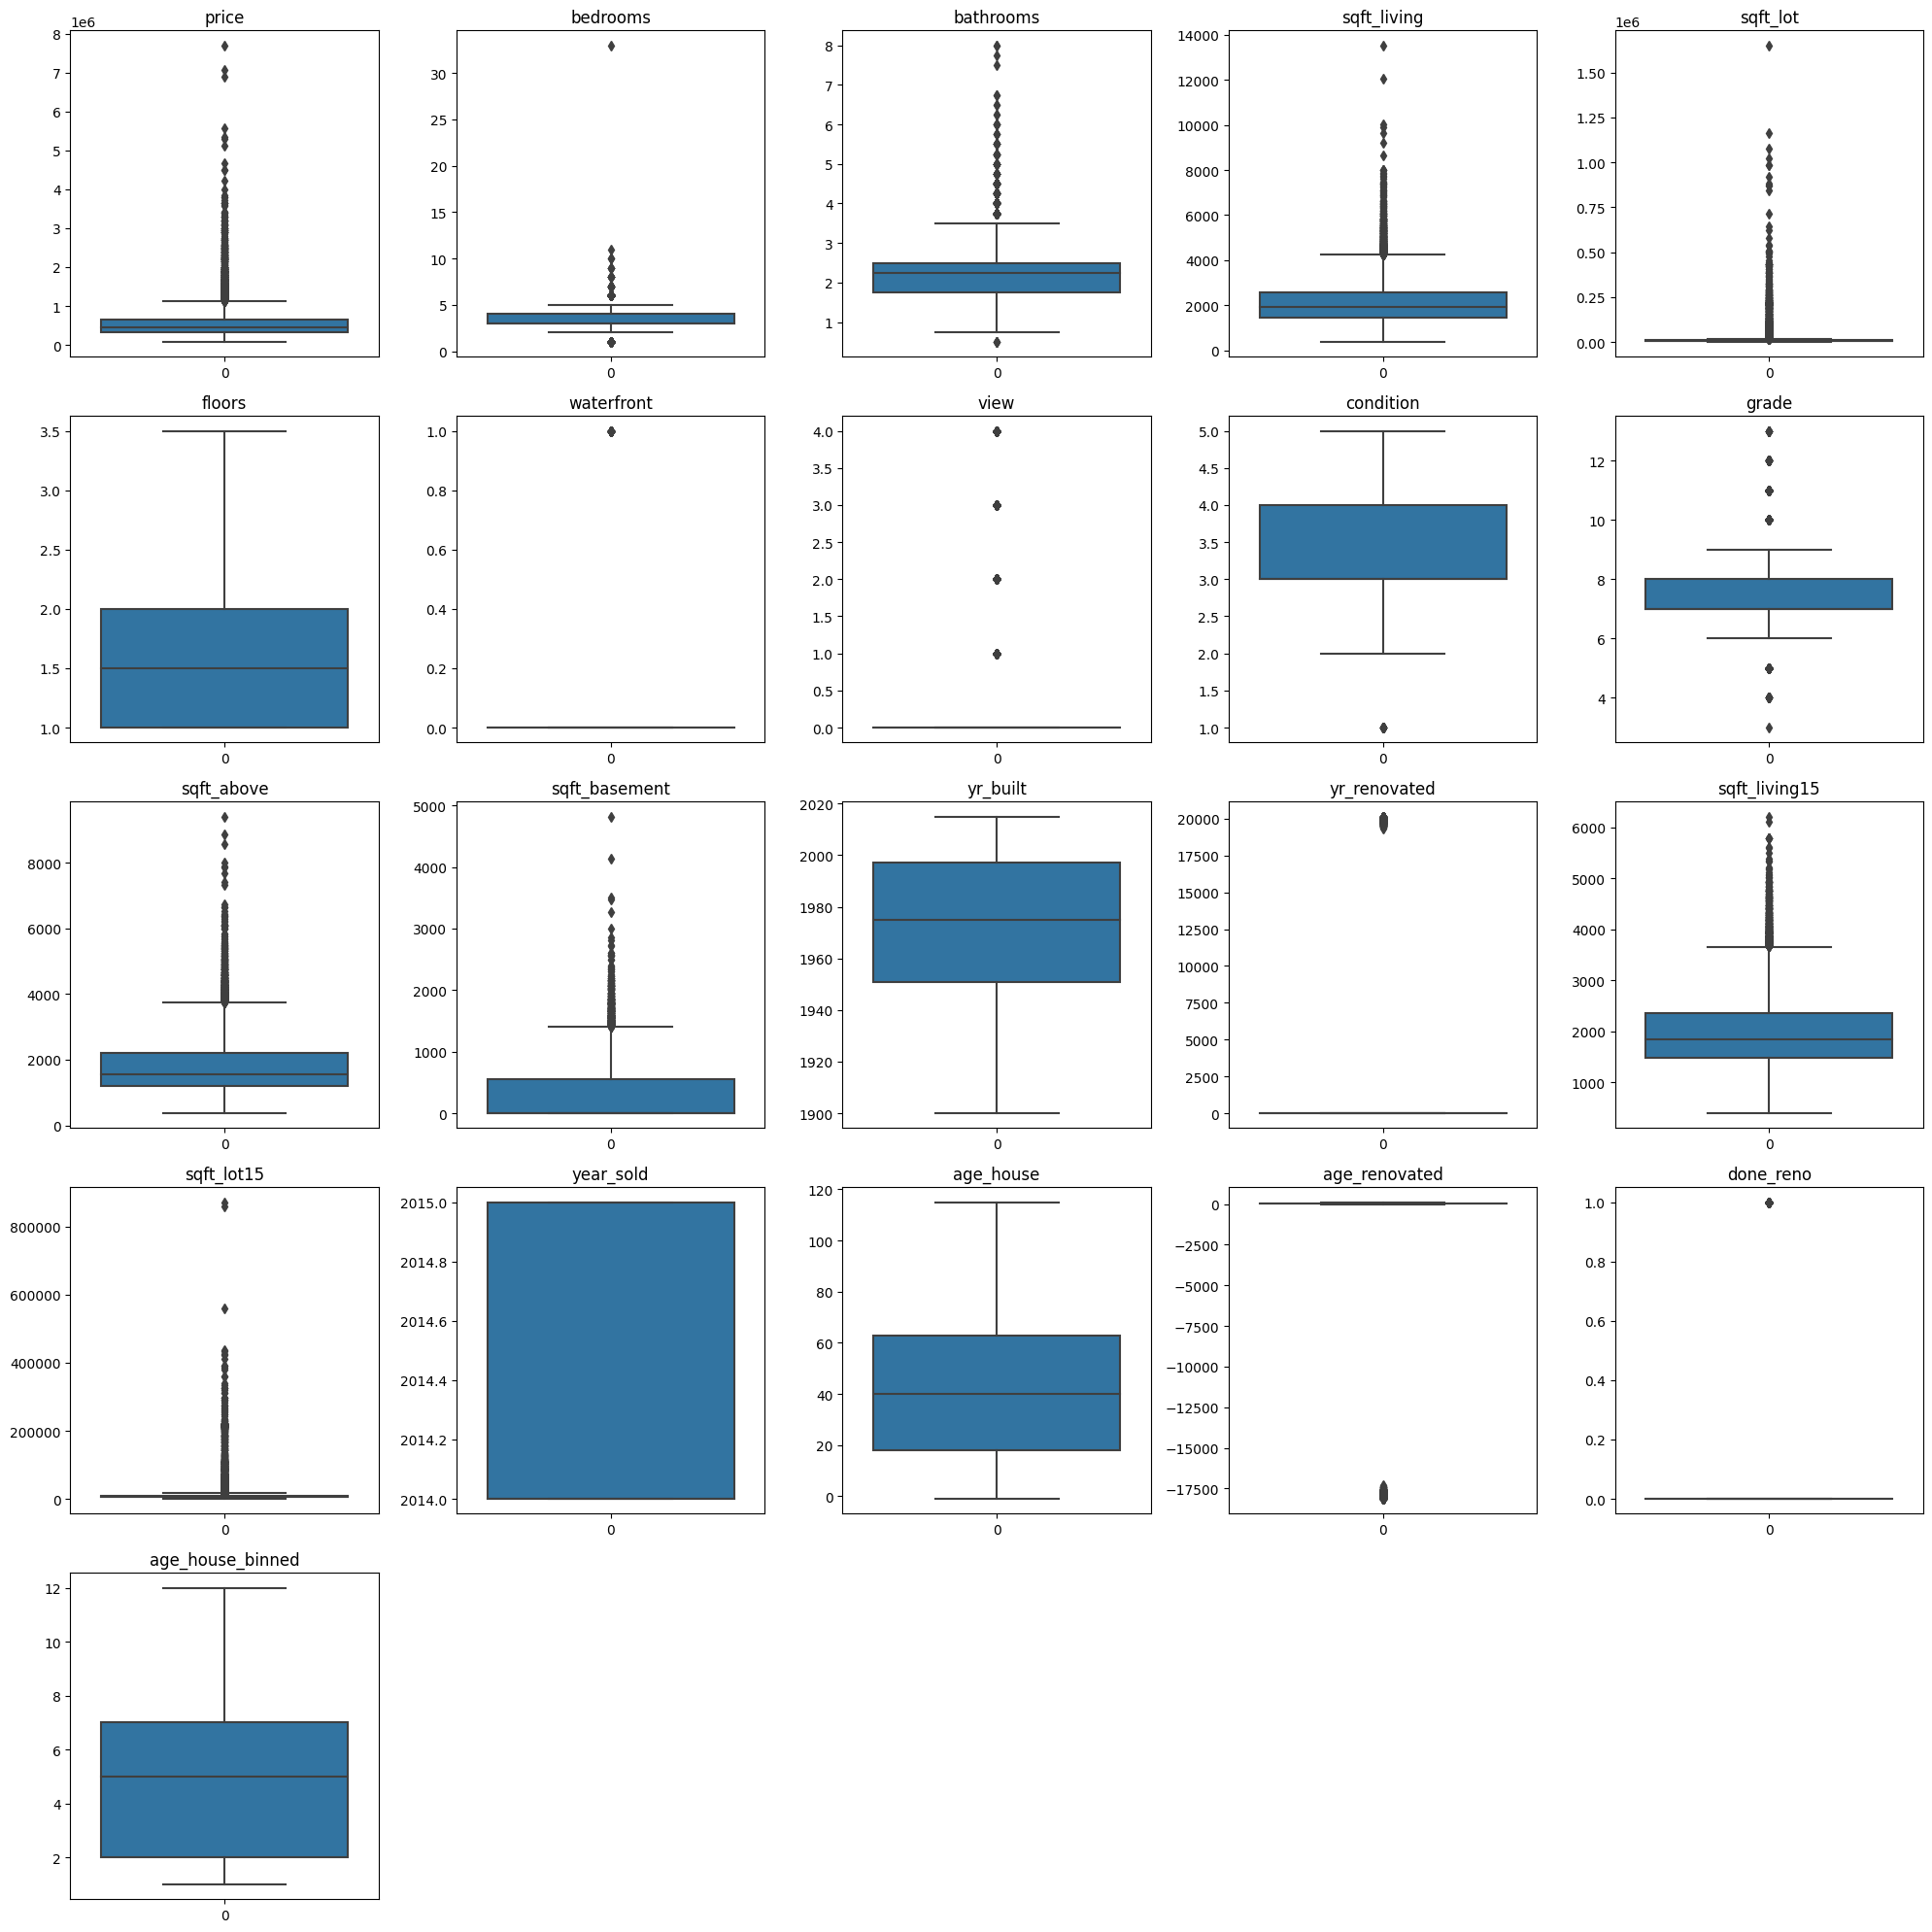

In [17]:
# Select numeric columns excluding specified columns
numeric_columns = [col for col in df.columns if col not in ['date', 'lat', 'long', 'zipcode']]
num_columns = len(numeric_columns)

# Calculate the number of rows and columns for the subplot layout
num_rows = (num_columns - 1) // 5 + 1  # Adjust the number of rows based on the number of columns
num_cols = min(num_columns, 5)  # Limit the number of columns to 5

plt.figure(figsize=(20, 4 * num_rows))  # Adjust the figure height based on the number of rows

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=df[column])
    plt.title(column)  # Set the title as the column name

plt.tight_layout()
plt.show()






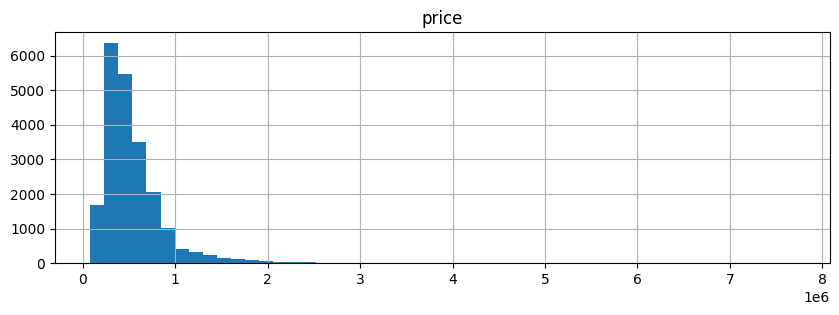

In [18]:
df.hist(column = 'price', bins = 50, figsize = (10, 3))
plt.show()

## Question 1: Does the location of a house affect the price?

**Hypothesis 1: The Proximity to City Center**
- The closer a house is to the city center, the higher its selling price.
- Houses located within a certain distance from the city center have a significantly higher price.

**Hypothesis 2: Waterfront Properties**
- Houses located near water bodies have a higher selling price compared to houses without a waterfront view.
- The presence of a waterfront view significantly impacts the price of a house.

**Indicators:** 
- Geolocation (distance from city center)
- Waterfront (yes/no)

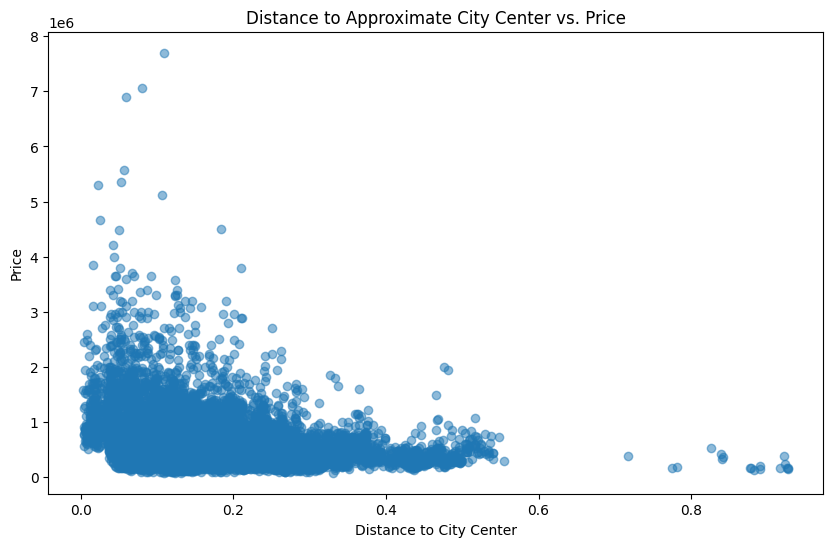

Correlation between distance to center and price: -0.26


In [19]:
# Calculate the mean latitude and longitude as an approximate city center
city_center_latitude = df['lat'].median()
city_center_longitude = df['long'].median()

# Calculate the Euclidean distance to the city center
df['distance_to_center'] = np.sqrt((df['lat'] - city_center_latitude)**2 + (df['long'] - city_center_longitude)**2)

# Create a scatter plot to visualize the distances
plt.figure(figsize=(10, 6))
plt.scatter(df['distance_to_center'], df['price'], alpha=0.5)
plt.title('Distance to Approximate City Center vs. Price')
plt.xlabel('Distance to City Center')
plt.ylabel('Price')
plt.show()

# Calculate the correlation between distance to center and price
correlation = df['distance_to_center'].corr(df['price'])

print(f'Correlation between distance to center and price: {correlation:.2f}')



In [20]:
import folium

bin_price = [0, 250000, 500000, 750000, 1000000, 2000000, df['price'].max()]
label_price = ['upto 250k', 'upto 500k', 'upto 750k', 'upto 1mil', 'upto 2mil', 'more than 2 mil']

df['price_group'] = pd.cut(df['price'], bins=bin_price, labels=label_price)
df.head()

Washington_map = folium.Map(location=[47.5, -122.2], zoom_start=10)

price_colors = {
    'upto 250k': 'red',
    'upto 500k': 'lightred',
    'upto 750k': 'orange',
    'upto 1mil': 'black',
    'upto 2mil': 'blue',
    'more than 2 mil': 'green'
}

for group, color in price_colors.items():
    df_group = df[df['price_group'] == group]
    for index, row in df_group.sample(n=100).iterrows():
        folium.Marker(
            location=[row['lat'], row['long']],
            tooltip=f"Price: {row['price']}",
            icon=folium.Icon(icon='building-o', prefix='fa', color=color)
        ).add_to(Washington_map)


Washington_map

In [21]:
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), annot = True)

correlation = df.corr()
correlation['price'].sort_values(ascending = False)[1:]


ValueError: could not convert string to float: 'upto 250k'

<Figure size 2000x800 with 0 Axes>

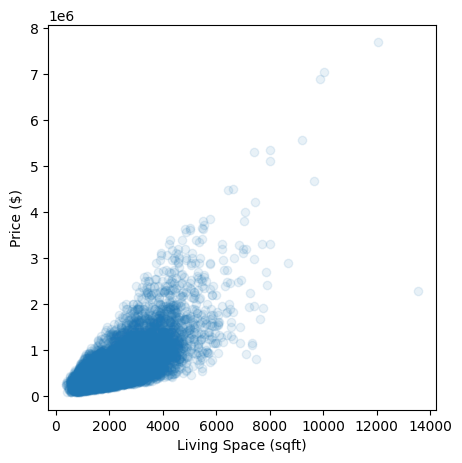

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(df['sqft_living'], df['price'], alpha = 0.1)
plt.xlabel("Living Space (sqft)")
plt.ylabel("Price ($)")
plt.show()

### Can I expect a substantial increase in the property's value after renovation?
### Are renovated homes in high demand?

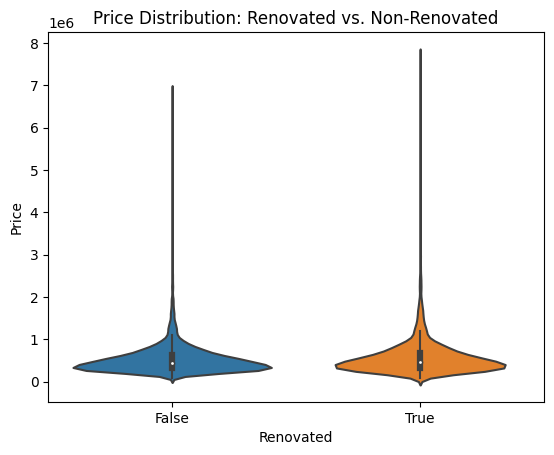

In [ ]:
# Can I expect a substantial increase in the property's value after renovation?


# Calculate median prices for renovated and non-renovated properties
median_price_renovated = df[df['yr_renovated'] != 0]['price'].median()
median_price_non_renovated = df[df['yr_renovated'] == 0]['price'].median()

# Calculate the difference in median prices
price_difference = median_price_renovated - median_price_non_renovated

# Create a box plot or violin plot for price distribution
sns.violinplot(x=df['yr_renovated'] != 0, y=df['price'])
plt.title("Price Distribution: Renovated vs. Non-Renovated")
plt.xlabel("Renovated")
plt.ylabel("Price")
plt.show()




In [ ]:
# Calculate the difference in median prices of renovated and non-renovated properties.

# Filter out properties that were not renovated
renovated_prices = df[df['yr_renovated'] > 0]['price']
non_renovated_prices = df[df['yr_renovated'] == 0]['price']

# Calculate median prices for renovated and non-renovated properties
median_renovated = renovated_prices.median()
median_non_renovated = non_renovated_prices.median()

# Calculate the difference in median prices
price_difference = median_renovated - median_non_renovated

# Print the results
print("Median price of renovated properties:", median_renovated)
print("Median price of non-renovated properties:", median_non_renovated)
print("Difference in median prices:", price_difference)

Median price of renovated properties: 607502.0
Median price of non-renovated properties: 448000.0
Difference in median prices: 159502.0


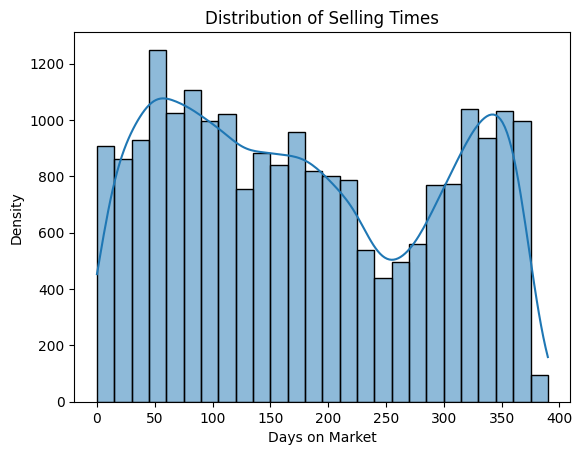

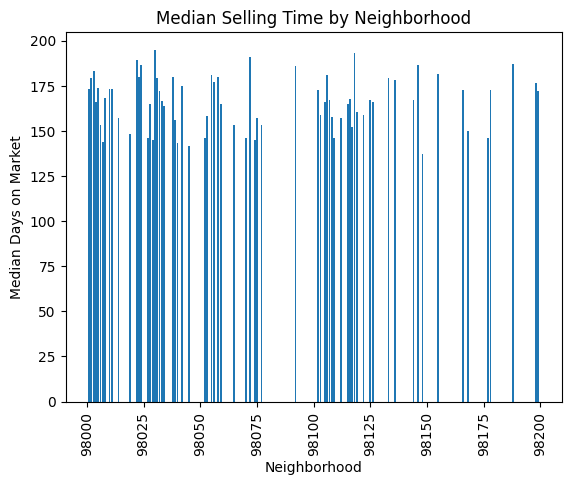

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
Name: count, dtype: int64

In [ ]:
# Calculate selling time (days on market) using the 'date' column
df['days_on_market'] = (df['date'] - df['date'].min()).dt.days

# Calculate median selling time for each neighborhood
median_selling_time = df.groupby('zipcode')['days_on_market'].median()

# Create histograms or density plots for selling times
sns.histplot(data=df, x='days_on_market', kde=True)
plt.title("Distribution of Selling Times")
plt.xlabel("Days on Market")
plt.ylabel("Density")
plt.show()

# Compare selling times across different neighborhoods
plt.bar(median_selling_time.index, median_selling_time.values)
plt.title("Median Selling Time by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Median Days on Market")
plt.xticks(rotation=90)
plt.show()



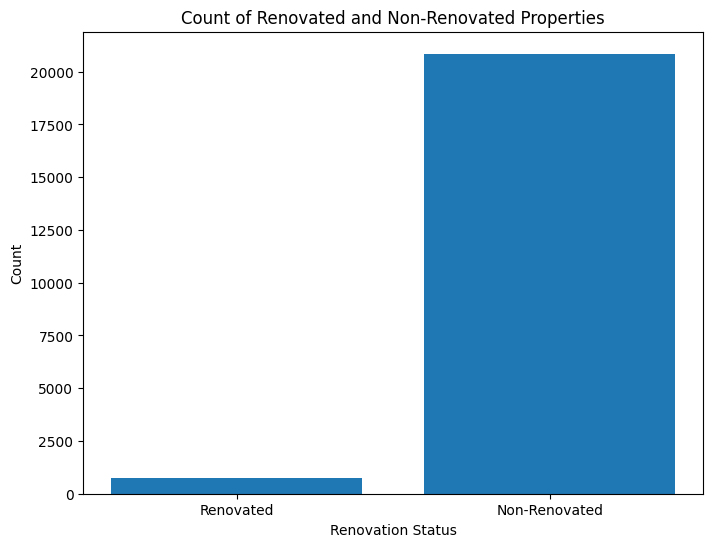

Percentage of renovated homes among all sold homes: 3.44%
Percentage of non-renovated homes among all sold homes: 96.56%


In [ ]:
# Count the number of renovated and non-renovated properties
renovated_count = df[df['yr_renovated'] > 0 ].shape[0]
non_renovated_count = df[(df['yr_renovated'] == 0) | (pd.isna(df['yr_renovated']))].shape[0]


# Calculate the total number of sold homes
total_sold_homes = df.shape[0]

# Calculate the percentage of renovated homes among all sold homes
percentage_renovated = (renovated_count / total_sold_homes) * 100
percentage_non_renovated = (non_renovated_count / total_sold_homes) * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Renovated', 'Non-Renovated'], [renovated_count, non_renovated_count])
plt.xlabel('Renovation Status')
plt.ylabel('Count')
plt.title('Count of Renovated and Non-Renovated Properties')
plt.show()

# Print the percentage of renovated homes
print(f"Percentage of renovated homes among all sold homes: {percentage_renovated:.2f}%")

# Print the percentage of non-renovated homes
print(f"Percentage of non-renovated homes among all sold homes: {percentage_non_renovated:.2f}%")


### why are there only 3.44% of renovated houses?

In [ ]:
# Convert the 'yr_renovated' column to datetime format for non-zero values
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: pd.to_datetime(str(int(x)), format='%Y') if x != 0 else pd.NaT)

# Calculate the difference in days between sale date and renovation date
df['days_on_market'] = (df['date'] - df['yr_renovated']).dt.days

# Separate renovated and non-renovated homes
renovated_homes = df[df['yr_renovated'].notnull()]
non_renovated_homes = df[df['yr_renovated'].isnull()]

# Calculate the average days on market for each category
avg_days_renovated = renovated_homes['days_on_market'].mean()
avg_days_non_renovated = non_renovated_homes['days_on_market'].mean()

# Calculate the median days on market for each category
median_days_renovated = renovated_homes['days_on_market'].median()
median_days_non_renovated = non_renovated_homes['days_on_market'].median()

print("Average Days on Market (Renovated):", avg_days_renovated)
print("Average Days on Market (Non-Renovated):", avg_days_non_renovated)
print("Median Days on Market (Renovated):", median_days_renovated)
print("Median Days on Market (Non-Renovated):", median_days_non_renovated)



ValueError: unconverted data remains when parsing with format "%Y": "0", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

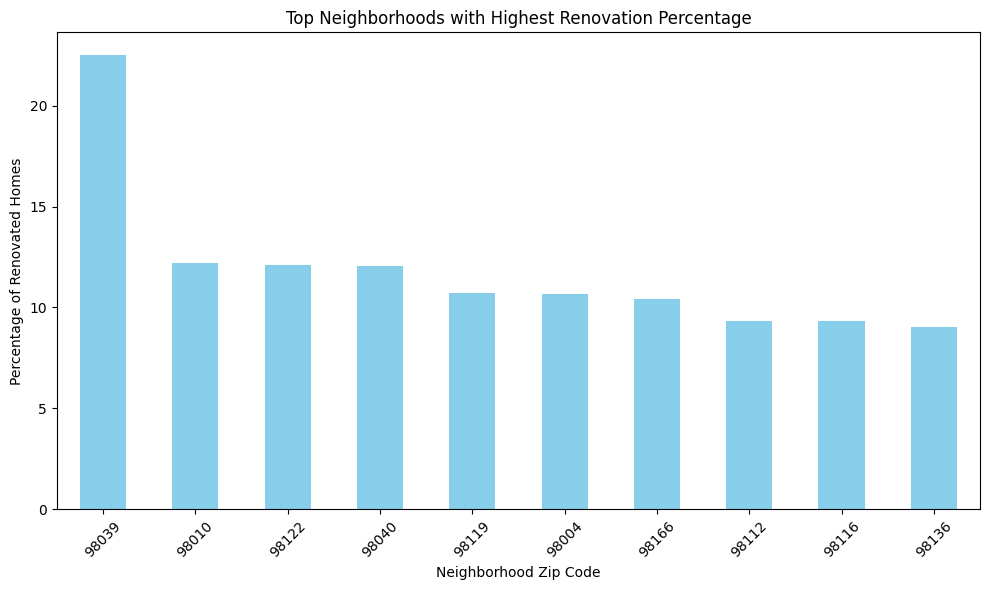

In [ ]:
# Group by 'zipcode' and 'yr_renovated', and count the number of renovated homes
renovated_counts = df[df['yr_renovated'] != 0].groupby('zipcode')['yr_renovated'].count()

# Group by 'zipcode' and count the total number of homes
total_counts = df.groupby('zipcode')['yr_renovated'].count()

# Calculate the percentage of renovated homes in each neighborhood
percentage_renovated = (renovated_counts / total_counts) * 100

# Sort the neighborhoods by percentage of renovated homes in descending order
sorted_neighborhoods = percentage_renovated.sort_values(ascending=False)

# Plot the top neighborhoods with the highest renovation percentages
plt.figure(figsize=(10, 6))
sorted_neighborhoods.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Neighborhood Zip Code')
plt.ylabel('Percentage of Renovated Homes')
plt.title('Top Neighborhoods with Highest Renovation Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()







In [22]:
# Group by 'zipcode' and 'yr_renovated', and count the number of renovated homes
renovated_counts = df[df['yr_renovated'] != 0].groupby('zipcode')['yr_renovated'].count()

# Group by 'zipcode' and count the total number of homes
total_counts = df.groupby('zipcode')['yr_renovated'].count()

# Calculate the percentage of renovated homes in each neighborhood
percentage_renovated = (renovated_counts / total_counts) * 100

# Sort the neighborhoods by percentage of renovated homes in descending order
sorted_neighborhoods = percentage_renovated.sort_values(ascending=False)

# Get the top neighborhoods with the highest renovation percentages
top_neighborhoods = sorted_neighborhoods.head(10)

# Create a map centered on the average lat-long of the dataset
average_lat = df['lat'].mean()
average_long = df['long'].mean()
m = folium.Map(location=[average_lat, average_long], zoom_start=10)

# Add markers for the top neighborhoods with renovation percentages
for zipcode, percentage in top_neighborhoods.items():
    tooltip = f"Zip Code: {zipcode}, Renovation Percentage: {percentage:.2f}%"
    folium.Marker(
        location=[df[df['zipcode'] == zipcode]['lat'].mean(), df[df['zipcode'] == zipcode]['long'].mean()],
        popup=tooltip,
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Display the map
m




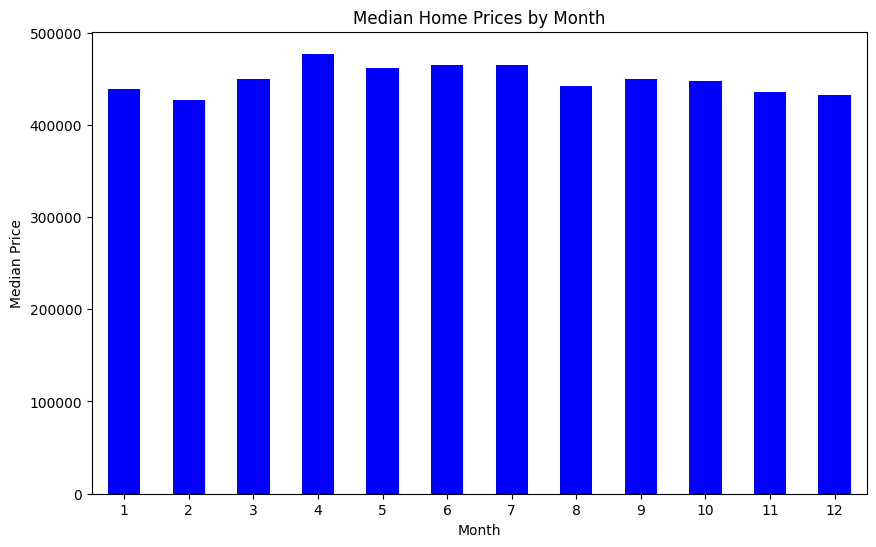

In [23]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the month from the 'date' column
df['month'] = df['date'].dt.month

# Group data by month and calculate the median price for each month
median_prices_by_month = df.groupby('month')['price'].median()

# Plot the median prices by month
plt.figure(figsize=(10, 6))
median_prices_by_month.plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.ylabel('Median Price')
plt.title('Median Home Prices by Month')
plt.xticks(rotation=0)
plt.show()


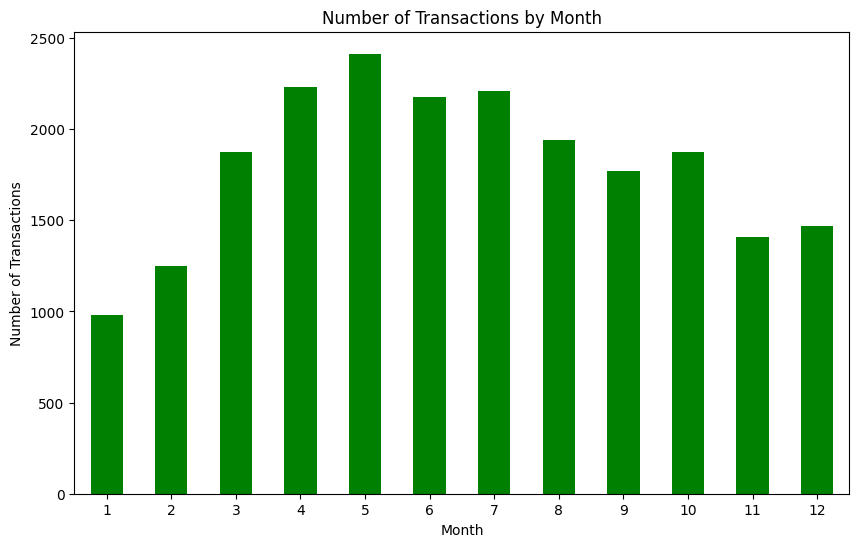

In [24]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the month from the 'date' column
df['month'] = df['date'].dt.month

# Group data by month and calculate the count of transactions (sales) for each month
transactions_by_month = df.groupby('month').size()

# Plot the number of transactions by month
plt.figure(figsize=(10, 6))
transactions_by_month.plot(kind='bar', color='green')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Month')
plt.xticks(rotation=0)
plt.show()


In [28]:
# Calculate the average price per square foot for each property
df['price_per_sqft'] = df['price'] / df['sqft_living']

# Group data by neighborhood and calculate the average price per square foot for each neighborhood
neighborhood_avg_price_per_sqft = df.groupby('zipcode')['price_per_sqft'].mean()

# Find the neighborhood with the highest average price per square foot
highest_price_neighborhood = neighborhood_avg_price_per_sqft.idxmax()
highest_price_value = neighborhood_avg_price_per_sqft.max()

print(f"The neighborhood with the highest average price per square foot is '{highest_price_neighborhood}' with an average price per square foot of ${highest_price_value:.2f}.")



The neighborhood with the highest average price per square foot is '98039' with an average price per square foot of $568.24.


In [37]:
import folium

# Calculate the median price per square foot across all zip codes

df['price_per_sqft'] = df['price'] / df['sqft_living']
median_price_per_sqft = df['price_per_sqft'].median()

# Print the result
print("Median Price per Square Foot across all Zip Codes:", median_price_per_sqft)

# Calculate the median price per square foot for each zipcode
df['price_per_sqft'] = df['price'] / df['sqft_living']
median_price_per_sqft_by_zipcode = df.groupby('zipcode')['price_per_sqft'].median()

# Get the top 10 zipcodes by median price per square foot
top_10_zipcodes = median_price_per_sqft_by_zipcode.sort_values(ascending=False).head(10)

# Print the median price per square foot for each of the top 10 zipcodes
for zipcode, median_price_per_sqft in top_10_zipcodes.items():
    print(f"Zip Code: {zipcode}, Median Price per Sqft: ${median_price_per_sqft:.2f}")



# Get the top 10 zipcodes by median price per square foot
top_10_zipcodes = median_price_per_sqft_by_zipcode.sort_values(ascending=False).head(10)

# Create a map centered around the mean latitude and longitude of the data
mean_latitude = df['lat'].mean()
mean_longitude = df['long'].mean()
map_center = [mean_latitude, mean_longitude]
m = folium.Map(location=map_center, zoom_start=10)

# Iterate through the top 10 zipcodes and plot them on the map with green color
for zipcode in top_10_zipcodes.index:
    lat = df.loc[df['zipcode'] == zipcode, 'lat'].mean()
    lon = df.loc[df['zipcode'] == zipcode, 'long'].mean()
    
    folium.Marker(
        location=[lat, lon],
        popup=f"Zip Code: {zipcode}",
        icon=folium.Icon(color='green')
    ).add_to(m)

# Display the map
m

# Display the map
m



Median Price per Square Foot across all Zip Codes: 244.64454976303318
Zip Code: 98039, Median Price per Sqft: $565.17
Zip Code: 98004, Median Price per Sqft: $456.94
Zip Code: 98109, Median Price per Sqft: $427.70
Zip Code: 98112, Median Price per Sqft: $424.24
Zip Code: 98119, Median Price per Sqft: $416.65
Zip Code: 98102, Median Price per Sqft: $406.36
Zip Code: 98105, Median Price per Sqft: $391.81
Zip Code: 98040, Median Price per Sqft: $376.37
Zip Code: 98107, Median Price per Sqft: $372.80
Zip Code: 98103, Median Price per Sqft: $360.47


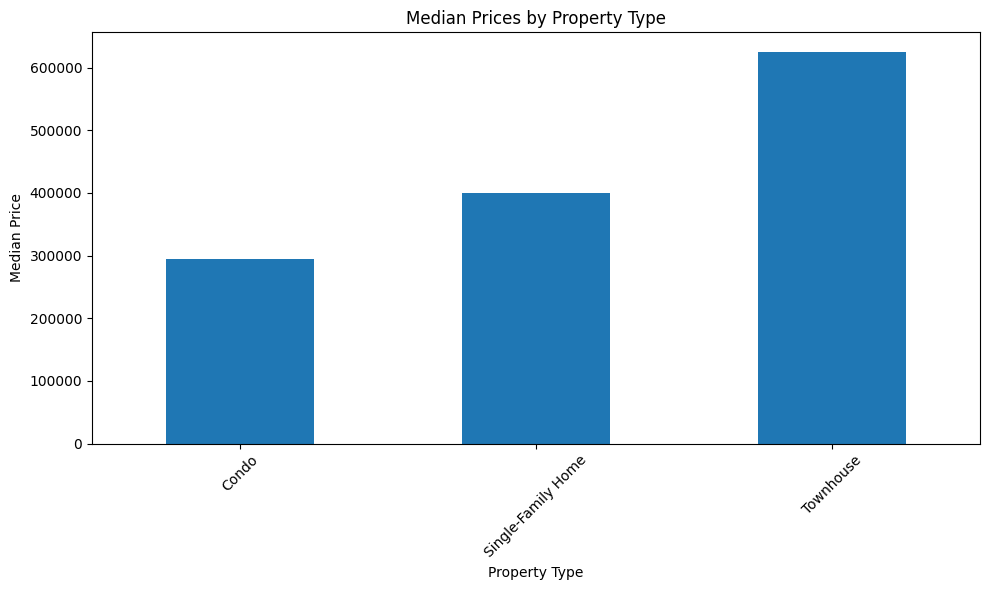

In [52]:
# Define bins for bedrooms and bathrooms
bedroom_bins = [0, 1, 2, 3, 4, 5, 6, df['bedrooms'].max()]
bathroom_bins = [0, 1, 2, 3, 4, df['bathrooms'].max()]

# Create labels for bins
bedroom_labels = ['1', '2', '3', '4', '5', '6', '7+']
bathroom_labels = ['1', '2', '3', '4', '5+']

# Add columns for bedroom and bathroom bins
df['bedroom_bin'] = pd.cut(df['bedrooms'], bins=bedroom_bins, labels=bedroom_labels)
df['bathroom_bin'] = pd.cut(df['bathrooms'], bins=bathroom_bins, labels=bathroom_labels)

# Create a dictionary to map bedroom and bathroom combinations to property types
property_type_mapping = {
    ('1', '1'): 'Condo',
    ('1', '2'): 'Condo',
    ('2', '1'): 'Single-Family Home',
    ('2', '2'): 'Single-Family Home',
    ('2', '3'): 'Single-Family Home',
    ('3', '1'): 'Single-Family Home',
    ('3', '2'): 'Single-Family Home',
    ('3', '3'): 'Single-Family Home',
    ('4', '3'): 'Townhouse',
    ('4', '4'): 'Townhouse',
    ('4', '5+'): 'Townhouse',
    ('5', '3'): 'Townhouse',
    ('5', '4'): 'Townhouse',
    ('5', '5+'): 'Townhouse',
    ('6', '3'): 'Townhouse',
    ('6', '4'): 'Townhouse',
    ('6', '5+'): 'Townhouse',
    ('7+', '3'): 'Townhouse',
    ('7+', '4'): 'Townhouse',
    ('7+', '5+'): 'Townhouse'
}

# Apply the property type mapping to create a new 'property_type' column
df['property_type'] = df.apply(lambda row: property_type_mapping.get((row['bedroom_bin'], row['bathroom_bin'])), axis=1)

# Calculate median price for each property type
median_price_by_property_type = df.groupby('property_type')['price'].median()

## Create a bar chart to visualize median prices by property type
plt.figure(figsize=(10, 6))
median_price_by_property_type.sort_values().plot(kind='bar')
plt.title('Median Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()



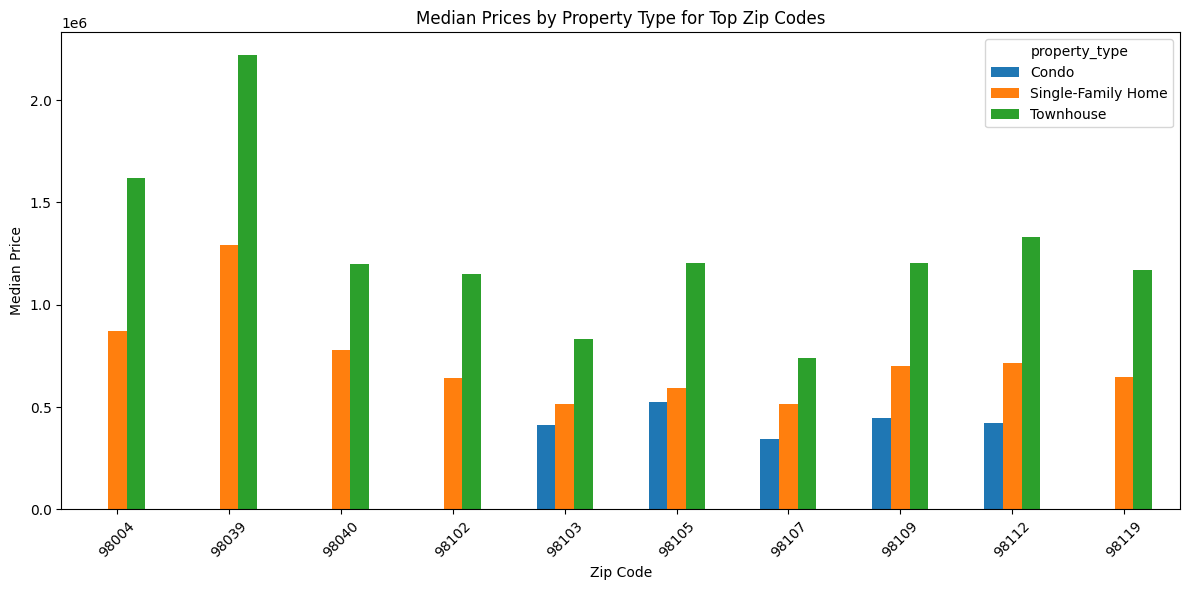

In [60]:
# Filter the top 10 zip codes with best median price per square foot
top_zipcodes = df.groupby('zipcode')['price_per_sqft'].median().nlargest(10).index.tolist()
df_top_zipcodes = df[df['zipcode'].isin(top_zipcodes)]


# Calculate median price for each property type and top zip code
median_price_by_property_type = df_top_zipcodes.groupby(['property_type', 'zipcode'])['price'].median()

# Reset the index for easier plotting
median_price_by_property_type = median_price_by_property_type.reset_index()

# Pivot the data to create a matrix for plotting
pivot_data = median_price_by_property_type.pivot(index='zipcode', columns='property_type', values='price')

# Create a bar chart to visualize median prices by property type for top zip codes
pivot_data.plot(kind='bar', figsize=(12, 6))
plt.title('Median Prices by Property Type for Top Zip Codes')
plt.xlabel('Zip Code')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()
